# Titanic

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

tabela = pd.read_csv("train.csv")

display(tabela)
display(tabela.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

### Dicionário de dados

- **PassengerId**: Identificador de cada passageiro - (Int)
- **Survived**: 0(não) e 1(sim) - (Int)
- **Pclass**: Status socioeconômico (1:Alto, 2:Médio, 3:Baixo) - (Int)
- **Name**: Nome do passageiro - (String)
- **Sex**: Gênero do passageiro - (String)
- **Age**: Idade do passageiro (Float)
- **SibSp**: Número de relações familiares (irmãos, cônjures) (Int)
- **Parch**: Número de relações familiares (pais, filhos) (Int)
- **Ticket**: Identificador do ticket do passageiro (String)
- **Fare**: Valor pago na passagem (Float)
- **Cabin**: Número da cabine do passageiro (String)
- **Embarked**: Porto de embarque do passageiro (String)

Sex
0    577
1    314
Name: count, dtype: int64
Embarked
0    644
1    168
2     77
Name: count, dtype: int64


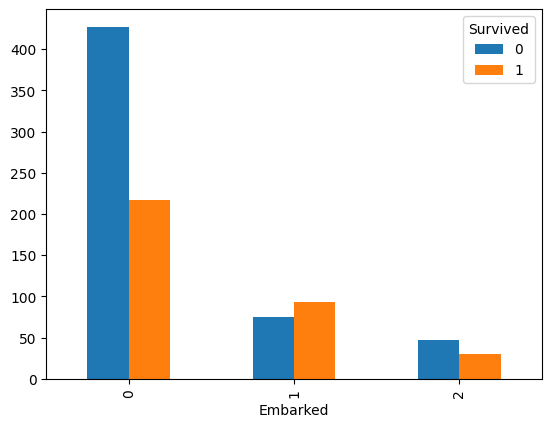

In [32]:
# Atualização de tipos (Genero) 
# Homem: 0, Mulher: 1
tabela['Sex'] = tabela['Sex'].map({'male': 0, 'female': 1}).astype(int)
print(tabela['Sex'].value_counts())

# Atualização de tipos (Local de Embarque)
# S: 0, C: 1, Q: 2
tabela = tabela.dropna(subset=['Embarked'])
tabela['Embarked'] = tabela['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
print(tabela["Embarked"].value_counts())

analise = tabela.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
analise.plot(kind='bar')

# Como anlisado no gráfico, o local de embarque não importa muito, podemos retirar
tabela = tabela.drop(columns='Embarked')

In [33]:
# Atualização da tabela (Retirando valores não úteis no momento)
# Iremos tirar provisoriamente a cabine, pois podemos julgar que não existe uma ligação direta
tabela = tabela.drop(columns=['Name', 'PassengerId', 'Ticket', "Cabin"])
display(tabela)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,NaN,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


<Axes: xlabel='Survived', ylabel='Fare'>

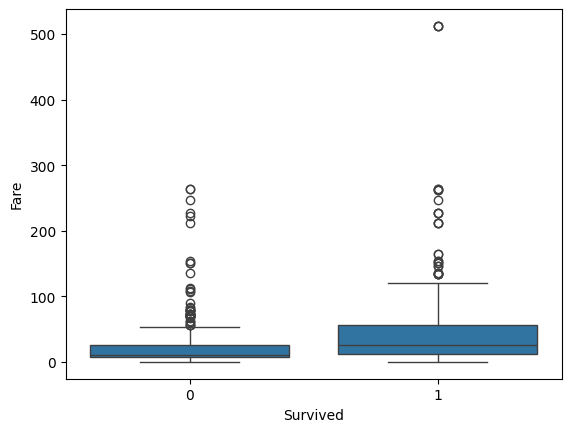

In [34]:
# Analise se o valor pago na passagem influenciou na sobrevivencia
sns.boxplot(x='Survived', y='Fare', data=tabela)

#Conclusão: Importa, mas não faremos o tratamento dos outliers por enquanto


In [35]:
# Analise da coluna Age

display(tabela['Age'].isnull().sum())

idadesNormal = tabela.dropna(subset='Age')
idadeNaN = tabela[tabela['Age'].isnull()].copy()

yA = idadesNormal['Age']
xA = idadesNormal.drop(columns=['Age', 'Survived'])

xA_treino, xA_teste, yA_treino, yA_teste = train_test_split(xA, yA, test_size=0.3) 
modeloA = GradientBoostingRegressor().fit(xA_treino, yA_treino)

# Testar eficácia
from sklearn.metrics import mean_absolute_error
previsao = modeloA.predict(xA_teste)
erro = mean_absolute_error(yA_teste, previsao)
print(f"Erro médio absoluto: {erro:.2f}")

# Previsão valores NaN
xA_NaN = idadeNaN.drop(columns=['Age', 'Survived'])
idadeNaN['Age'] = modeloA.predict(xA_NaN)

idadeNaN.loc[idadeNaN['Age'] > 0, 'Age'] = np.ceil(idadeNaN.loc[idadeNaN['Age'] > 0, 'Age'])

# Atualizar valores NaN na tabela original
tabela = tabela.dropna(subset=['Age'])
tabela = pd.concat([tabela,idadeNaN]).sort_index()

display(tabela)
display(tabela.describe())


177

Erro médio absoluto: 9.08


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,12.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.591867,0.524184,0.382452,32.096681
std,0.486260,0.834700,0.477538,13.504637,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
# Normalização dos valores de Fare
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# tabela['Fare'] = scaler.fit_transform(tabela[['Fare']])

# sns.boxplot(x='Survived', y='Fare', data=tabela)
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 52.1 KB


None

In [37]:
# Aplicar o machine learn

# Quem será previsto e quem será usado
y = tabela['Survived']
x = tabela.drop(columns=['Survived'])

# Separar em dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3) 

In [38]:
# Criar o aprendizado de máquina, usaremos Arvores de Decisões
modelo = RandomForestClassifier().fit(x_treino, y_treino)

# Testar eficácia
previsao = modelo.predict(x_teste)
accuracy = accuracy_score(y_teste, previsao) * 100
print(f"Previsão: {accuracy:.1f}")

Previsão: 82.8


# Testes do modelo


In [51]:
from funtion import atualizacaoTabela
from funtion import saidaSobreviventes

teste = pd.read_csv("test.csv")

teste = atualizacaoTabela(teste, modeloA)

sobreviventes = modelo.predict(teste)

In [53]:
# Saida
saida = saidaSobreviventes(sobreviventes)
display(saida)

saida.to_csv('minha_saida.csv', index=False)

,PassagerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
